In [2]:
import pandas as pd
import numpy as np
import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.metrics import plot_roc_curve


import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def clean_review(review):

    review = review.lower()
    # Clean the text
    review = re.sub(r"<br />", " ", review)
    review = re.sub(r"[^a-z]", " ", review)
    review = re.sub(r"   ", " ", review) # Remove any extra spaces
    review = re.sub(r"  ", " ", review)
    #remove stopwords
    tokenized = word_tokenize(review)
    review = [w for w in tokenized if not w in stop_words]
    review = " ".join(review)

    return(review)


def clean_data(train_reviews,test_reviews) :
    '''Input - train and test reviews
    Output - cleaned train and test reviews'''

    train_reviews_list =[]
    test_reviews_list = []
    
    for t_re in train_reviews:
        train_reviews_list.append(clean_review(t_re))
        
    for te_re in test_reviews:
        test_reviews_list.append(clean_review(te_re))
    
    return train_reviews_list,test_reviews_list

    
def create_bag_words_CountVec(train_reviews,test_reviews) :
    '''Input - train and test reviews
    Output - the trained vectorizer and train and test feature matrix'''

    vectorizer = CountVectorizer()
    
    vectorizer.fit(train_reviews)
    
    tr = vectorizer.transform(train_reviews)
    te = vectorizer.transform(test_reviews)

    return vectorizer,tr.toarray(),te.toarray()

def create_bag_words_TfIdf(train_reviews,test_reviews) :
    '''Input - train and test reviews
    Output - the trained vectorizer and train and test feature matrix'''

    vectorizer = TfidfVectorizer()
    
    vectorizer.fit(train_reviews)
    
    tr = vectorizer.transform(train_reviews)
    te = vectorizer.transform(test_reviews)

    return vectorizer,tr.toarray(),te.toarray()

In [4]:
stop_words = stopwords.words("english")
stop_words = set(stop_words)

In [5]:
df = pd.read_csv('Roman Urdu DataSet.csv',header=None)
df = df[df.columns[:-1]]
df.columns = 'Text,label'.split(',')
df = df.fillna('')
df = df[1000:5000]

In [6]:
df.label.value_counts()

Positive    2762
Neutral     1238
Name: label, dtype: int64

In [7]:
dfx = df.copy()

In [8]:
dfx['label2'] = [1 if i == 'Positive' else 0 for i in df.label]

In [9]:
dfx['Sen_len'] = dfx.Text.apply(len)

In [10]:
dfx['T_word'] = dfx.Text.apply(lambda x: len(x.split(' ')))

In [11]:
lx = []
lxc = []
for i in dfx.Text[:]:
    c=0
    cc=0
    for j in i:
        if j.isupper():
            c+=1
        if j.islower():
            cc+=1
    lx.append(c)
    lxc.append(cc)


In [12]:
dfx['T_upp'] = lx
dfx['T_lower'] = lxc

In [13]:
dfx

,Text,label,label2,Sen_len,T_word,T_upp,T_lower
1000,Mujhe apni shakhsiyat ke niswani pehlon ke sat...,Positive,1,76,14,1,61
1001,Agar aap ko piyar aur acha mahaul milta hai to...,Positive,1,88,19,1,68
1002,Main ne Imran ko bataya tha ke jab mere walid ...,Positive,1,128,28,2,98
1003,Imran bhi har din subha ki walk ke bad mere li...,Positive,1,65,14,1,50
1004,"Mujhe jewelry ki koi zarorat nahi, kyun ke Imr...",Positive,1,116,21,3,91
...,...,...,...,...,...,...,...
4995,Bas aisa to ho hi jaata hai 🤪🤪🤪,Neutral,0,31,8,1,20
4996,Hahaha its me Sara din dieting or rat me usi d...,Neutral,0,68,14,2,50
4997,This is no one more than me,Neutral,0,27,7,1,20
4998,ar chess cake uski buht craving hoti aftr pizz...,Neutral,0,56,11,0,46


<AxesSubplot:>

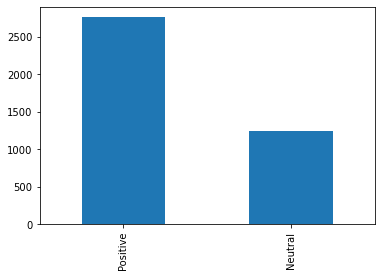

In [14]:
dfx.label.value_counts().plot(kind='bar')

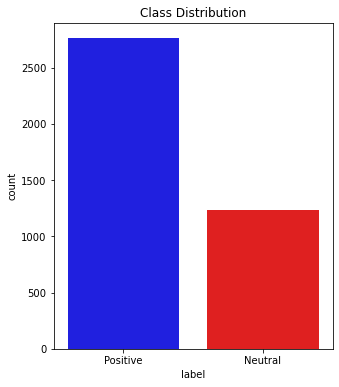

In [15]:
my_pal = {'Positive': 'blue', 'Neutral': 'red'}

plt.figure(figsize = (5, 6))
ax = sns.countplot(x = 'label', data = dfx, palette = my_pal)
plt.title('Class Distribution')
plt.show()

In [16]:
x = dfx.groupby('label').count()['Text'].reset_index().sort_values(by='Text',ascending=False)
x.style.background_gradient(cmap='summer')

,label,Text
1,Positive,2762
0,Neutral,1238


<AxesSubplot:ylabel='label'>

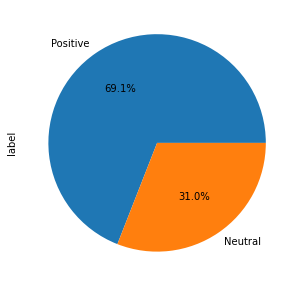

In [17]:
df['label'].value_counts().plot(kind='pie',figsize=(8,5),autopct='%1.1f%%')


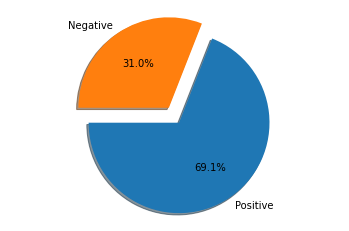

In [18]:
labels = 'Positive', 'Negative'

explode = (0.2, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(list(dfx.label2.value_counts()), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=180)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

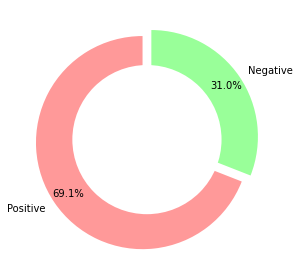

In [19]:
labels = 'Positive', 'Negative'

#colors
colors = ['#ff9999','#99ff99']
#explsion
explode = (0.05,0.05)
 
plt.pie(list(dfx.label2.value_counts()), colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

<AxesSubplot:>

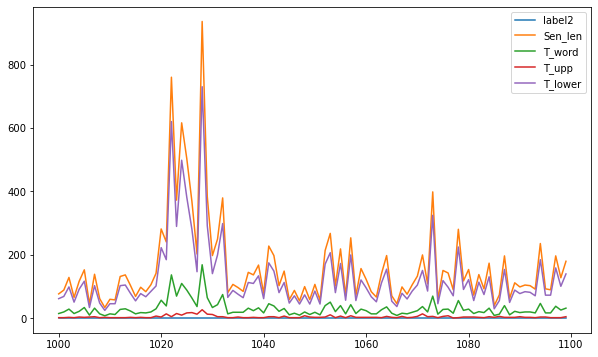

In [20]:
dfx[:100].plot(kind='line',figsize=(10,6))

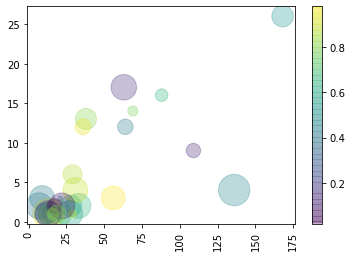

In [21]:
fig = plt.figure()
plt.xticks(rotation='vertical')
rng = np.random.RandomState(0)
colors = rng.rand(30)
sizes = 1000 * rng.rand(30)
plt.scatter(dfx.T_word[:30], dfx.T_upp[:30], c=colors, s=sizes, alpha=0.3,cmap='viridis')
plt.colorbar()
plt.show()


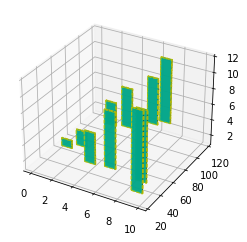

In [22]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

xpos = [i for i in range(len(list(dfx.T_word[:10])))]
ypos = list(dfx.T_lower[:10])
num_elements = len(xpos)
zpos =list(dfx.T_upp[:10])

dx = np.ones(10)
dy = np.ones(10)
dz = [1,2,3,4,5,6,7,8,9,10]

ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color='#00ceaa',alpha=0.8,edgecolor='y',linestyle='--')
plt.show()

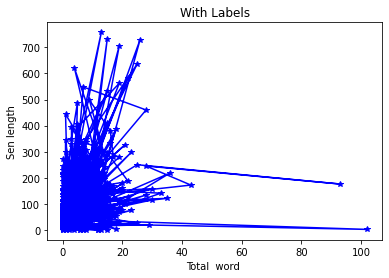

In [23]:
plt.figure()
plt.plot(dfx.T_upp,dfx['T_lower'],color='blue', marker='*')  

plt.xlabel("Total  word ")
plt.ylabel("Sen length")
plt.title("With Labels")

plt.show()

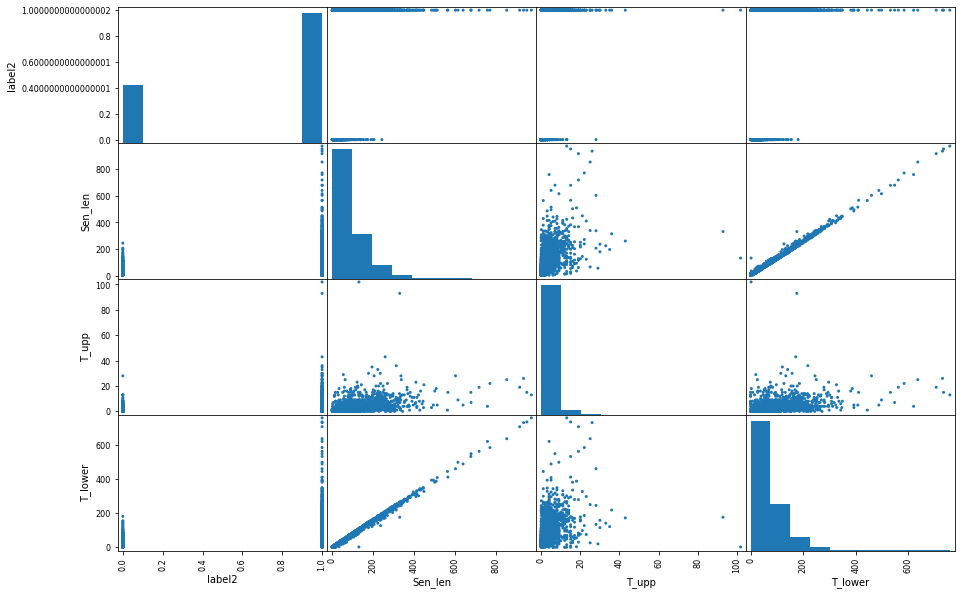

In [24]:
#check first thousand rows

pd.plotting.scatter_matrix(dfx[['label2','Sen_len','T_upp','T_lower']],figsize=(15,10),diagonal='hist',alpha=1)
plt.show()

<AxesSubplot:xlabel='label2', ylabel='Sen_len'>

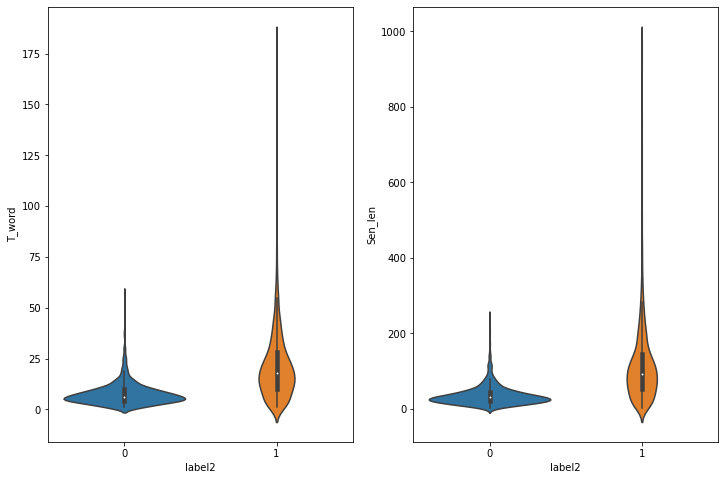

In [25]:
plt.figure(figsize=(12, 8)) 

plt.subplot(1,2,1)

sns.violinplot(x = 'label2', y = 'T_word', data = dfx[0:],kind="violin",height=4, aspect=.7)

plt.subplot(1,2,2)

sns.violinplot(x = 'label2', y = 'Sen_len', data = dfx[0:])

<AxesSubplot:xlabel='label2', ylabel='T_upp'>

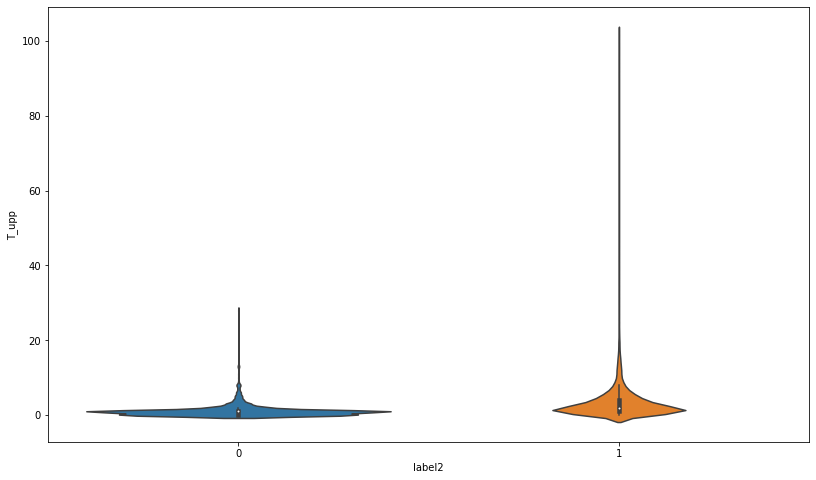

In [26]:
plt.figure(figsize=(30, 8))

plt.subplot(1,2,1)

sns.violinplot(x = 'label2', y = 'T_upp', data = dfx[0:])

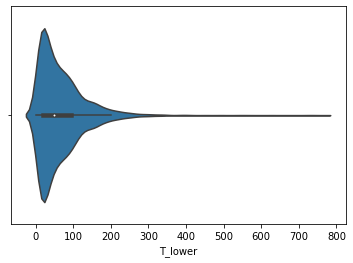

In [27]:
ax = sns.violinplot(x=dfx["T_lower"])

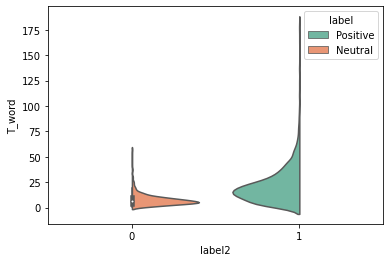

In [28]:
ax = sns.violinplot(x="label2", y="T_word", hue="label",
                    data=dfx, palette="Set2", split=True,
                    scale="count")

C:\Users\Dell\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='T_lower', ylabel='Density'>

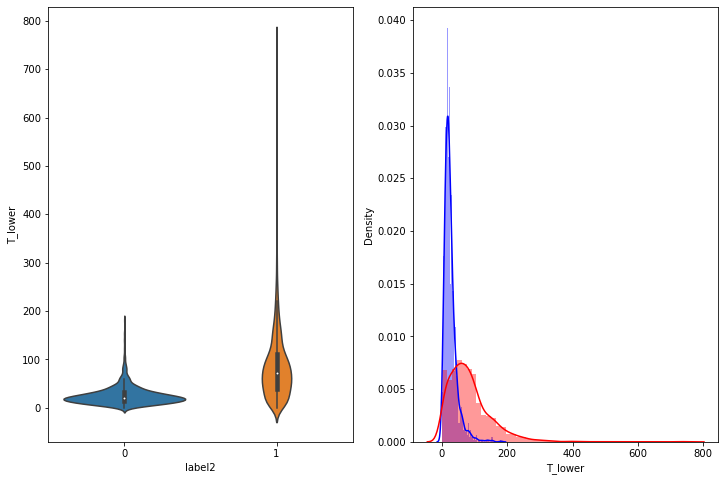

In [29]:

plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)

sns.violinplot(x = 'label2', y = 'T_lower', data = dfx[0:])

plt.subplot(1,2,2)
sns.distplot(dfx[dfx['label2'] == 0]['T_lower'][0:] , label = "0", color = 'blue')
sns.distplot(dfx[dfx['label2'] == 1]['T_lower'][0:] , label = "1" , color = 'red' )

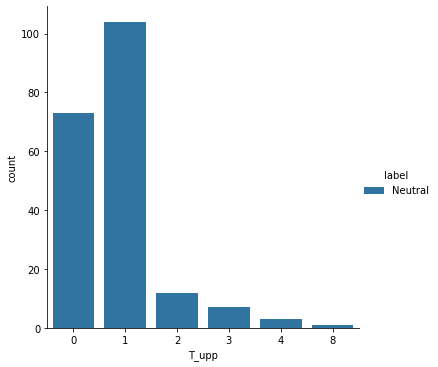

In [30]:
sns.catplot(data=dfx[3700:3900],kind='count',x='T_upp',hue='label')

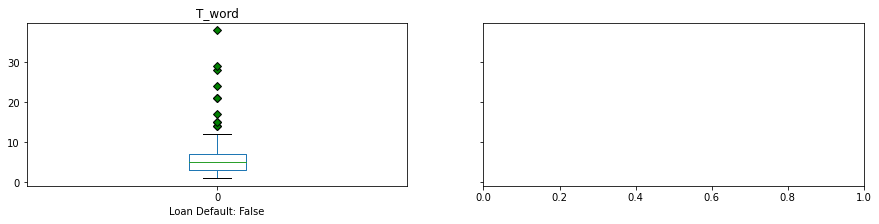

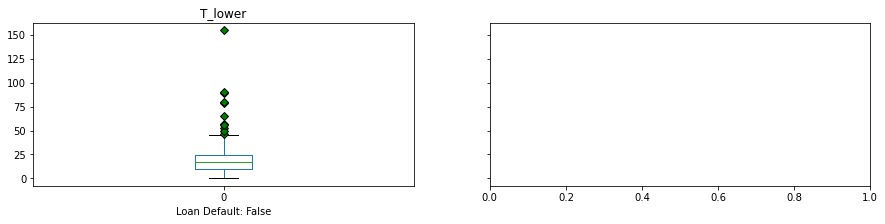

In [31]:
cols = ['T_word', 'T_lower']
green_diamond = dict(markerfacecolor='g', marker='D')
for j, col in enumerate(cols):
    fig, axs = plt.subplots(1, len(cols), figsize=(15, 3), sharey=True)
    for i, (val, group) in enumerate(dfx[3600:3900].groupby('label2')):
        group[col].plot.box( ax=axs[i], label=val,flierprops=green_diamond)
        axs[i].set_title(col)
        axs[i].set_xlabel("Loan Default: %s"%bool(val))
    plt.show()

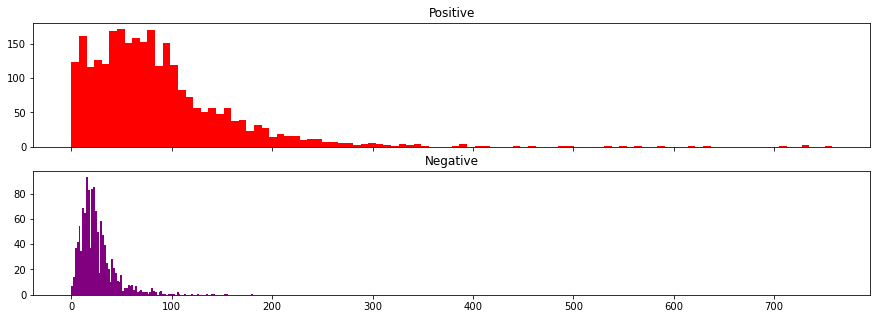

In [32]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,5))

bins = 100

ax1.hist(dfx.T_lower[dfx.label2 == 1], bins = bins, color = 'red')
ax1.set_title('Positive')

ax2.hist(dfx.T_lower[dfx.label2 == 0], bins = bins, color = 'purple')
ax2.set_title('Negative')

plt.show()

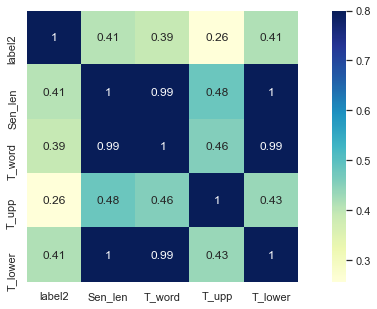

In [33]:
sns.set()

cols = dfx[dfx.columns[1:]]
corr = cols.corr()
f, ax = plt.subplots(figsize=(12, 5))
sns.heatmap(corr, annot=True, vmax=.8, square=True,cmap = 'YlGnBu');

<AxesSubplot:>

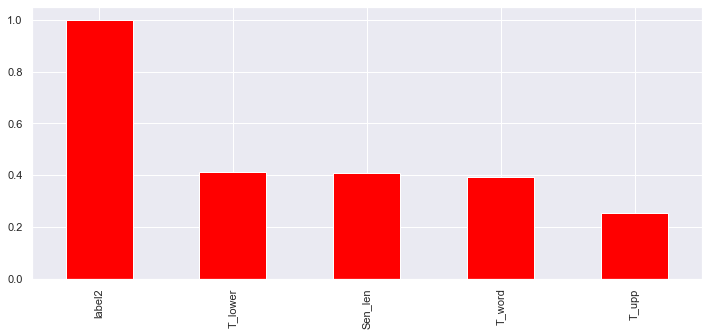

In [34]:
f,ax = plt.subplots(figsize = (12,5))
dfx.corr()['label2'].sort_values(ascending = False).plot.bar(color='red')

C:\Users\Dell\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


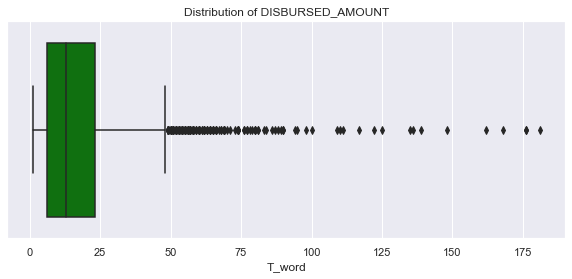

In [35]:
plt.figure(figsize=(10,4))
plt.title("Distribution of %s" % 'DISBURSED_AMOUNT')
sns.boxplot(dfx['T_word'].dropna(),color='green')

plt.show()

C:\Users\Dell\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


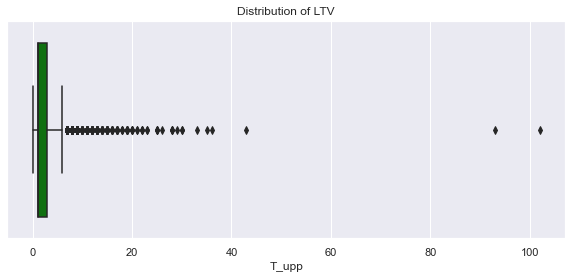

In [36]:
plt.figure(figsize=(10,4))
plt.title("Distribution of %s" % 'LTV')
sns.boxplot(dfx['T_upp'].dropna(),color='green')
plt.show()

In [37]:
dfx.label.value_counts()

Positive    2762
Neutral     1238
Name: label, dtype: int64

In [38]:
X = dfx.Text 
Y = dfx.label2


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [40]:
train_reviews,test_reviews = clean_data(X_train,X_test)
vectorizer,X_train,X_test = create_bag_words_TfIdf(train_reviews,test_reviews)

In [41]:
a = GaussianNB()
b = DecisionTreeClassifier(criterion = "entropy", random_state=13)
c = KNeighborsClassifier(n_neighbors=65)
d = LogisticRegression(random_state=0)
e = RandomForestClassifier(n_estimators=2)
f = AdaBoostClassifier(n_estimators=100)
g = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
h = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

In [42]:
all_model = [a,b,c,d,e,f,g,h]
all_model_name = 'NB,DT,KNN,LogisticReg,RandomForest,AdaBoost,GradientBoosting,MLP'.split(',')

In [43]:
accuracy = {}
f1 = {}
rec = {}
prec = {}
def load_model(model,name):
    
    model = model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    test_accuracy = accuracy_score(y_test, y_pred)
    f1_s = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    conf = confusion_matrix(y_test, y_pred)
    print(30*'-',name,'-'*30)
    print(conf)
    print(classification_report(y_test, y_pred))
    
    plot_roc_curve(model, X_test, y_test)
    plt.show()
    
    print(30*'-','END','-'*30)
    
    accuracy[name] = test_accuracy
    f1[name]= f1_s
    rec[name] = recall
    prec[name] = precision
    


------------------------------ NB ------------------------------
[[179  68]
 [ 33 520]]
              precision    recall  f1-score   support

           0       0.84      0.72      0.78       247
           1       0.88      0.94      0.91       553

    accuracy                           0.87       800
   macro avg       0.86      0.83      0.85       800
weighted avg       0.87      0.87      0.87       800



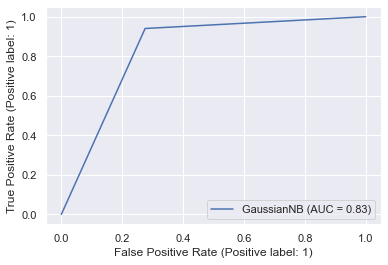

------------------------------ END ------------------------------
------------------------------ DT ------------------------------
[[191  56]
 [ 63 490]]
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       247
           1       0.90      0.89      0.89       553

    accuracy                           0.85       800
   macro avg       0.82      0.83      0.83       800
weighted avg       0.85      0.85      0.85       800



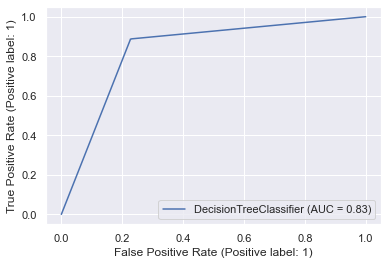

------------------------------ END ------------------------------
------------------------------ KNN ------------------------------
[[130 117]
 [ 37 516]]
              precision    recall  f1-score   support

           0       0.78      0.53      0.63       247
           1       0.82      0.93      0.87       553

    accuracy                           0.81       800
   macro avg       0.80      0.73      0.75       800
weighted avg       0.80      0.81      0.80       800



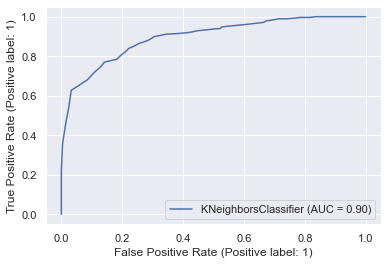

------------------------------ END ------------------------------
------------------------------ LogisticReg ------------------------------
[[183  64]
 [ 30 523]]
              precision    recall  f1-score   support

           0       0.86      0.74      0.80       247
           1       0.89      0.95      0.92       553

    accuracy                           0.88       800
   macro avg       0.88      0.84      0.86       800
weighted avg       0.88      0.88      0.88       800



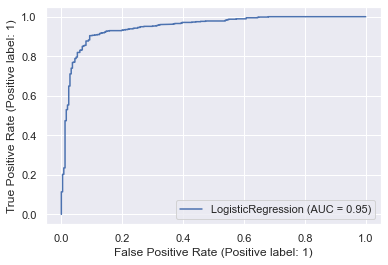

------------------------------ END ------------------------------
------------------------------ RandomForest ------------------------------
[[215  32]
 [133 420]]
              precision    recall  f1-score   support

           0       0.62      0.87      0.72       247
           1       0.93      0.76      0.84       553

    accuracy                           0.79       800
   macro avg       0.77      0.81      0.78       800
weighted avg       0.83      0.79      0.80       800



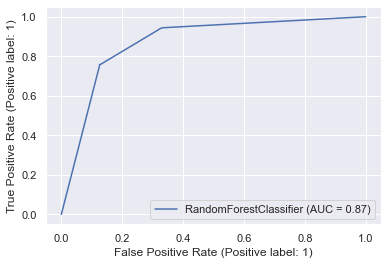

------------------------------ END ------------------------------
------------------------------ AdaBoost ------------------------------
[[215  32]
 [ 70 483]]
              precision    recall  f1-score   support

           0       0.75      0.87      0.81       247
           1       0.94      0.87      0.90       553

    accuracy                           0.87       800
   macro avg       0.85      0.87      0.86       800
weighted avg       0.88      0.87      0.87       800



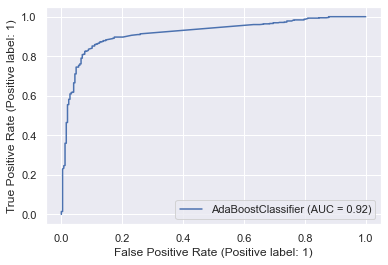

------------------------------ END ------------------------------
------------------------------ GradientBoosting ------------------------------
[[211  36]
 [ 61 492]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       247
           1       0.93      0.89      0.91       553

    accuracy                           0.88       800
   macro avg       0.85      0.87      0.86       800
weighted avg       0.88      0.88      0.88       800



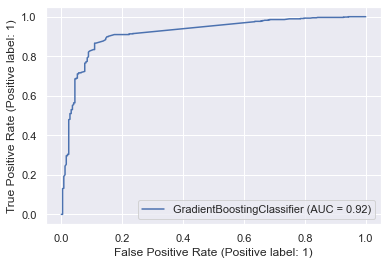

------------------------------ END ------------------------------
------------------------------ MLP ------------------------------
[[207  40]
 [ 42 511]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       247
           1       0.93      0.92      0.93       553

    accuracy                           0.90       800
   macro avg       0.88      0.88      0.88       800
weighted avg       0.90      0.90      0.90       800



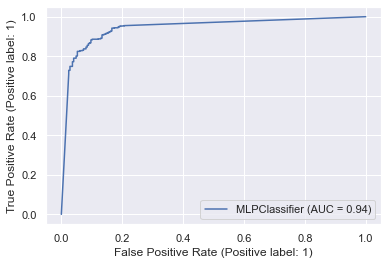

------------------------------ END ------------------------------


In [44]:
for modl,nam in zip(all_model,all_model_name):
    load_model(modl,nam)

In [53]:
accuracy

{'NB': 0.87375,
 'DT': 0.85125,
 'KNN': 0.8075,
 'LogisticReg': 0.8825,
 'RandomForest': 0.79375,
 'AdaBoost': 0.8725,
 'GradientBoosting': 0.87875,
 'MLP': 0.8975}

In [46]:
f1

{'NB': 0.9114811568799299,
 'DT': 0.8917197452229298,
 'KNN': 0.8701517706576728,
 'LogisticReg': 0.9175438596491228,
 'RandomForest': 0.8358208955223881,
 'AdaBoost': 0.9044943820224718,
 'GradientBoosting': 0.910268270120259,
 'MLP': 0.9257246376811593}

In [47]:
rec

{'NB': 0.9403254972875226,
 'DT': 0.8860759493670886,
 'KNN': 0.9330922242314648,
 'LogisticReg': 0.945750452079566,
 'RandomForest': 0.759493670886076,
 'AdaBoost': 0.8734177215189873,
 'GradientBoosting': 0.8896925858951176,
 'MLP': 0.9240506329113924}

In [48]:
prec

{'NB': 0.8843537414965986,
 'DT': 0.8974358974358975,
 'KNN': 0.8151658767772512,
 'LogisticReg': 0.8909710391822828,
 'RandomForest': 0.9292035398230089,
 'AdaBoost': 0.9378640776699029,
 'GradientBoosting': 0.9318181818181818,
 'MLP': 0.9274047186932849}

In [49]:
da = list(zip(accuracy.values(),prec.values(),rec.values(),f1.values()))
df = pd.DataFrame(index=all_model_name,data=da,columns='Accuracy,Precision,Recall, F1-Score'.split(','))
df

,Accuracy,Precision,Recall,F1-Score
NB,0.87375,0.884354,0.940325,0.911481
DT,0.85125,0.897436,0.886076,0.891720
KNN,0.80750,0.815166,0.933092,0.870152
LogisticReg,0.88250,0.890971,0.945750,0.917544
RandomForest,0.79375,0.929204,0.759494,0.835821
AdaBoost,0.87250,0.937864,0.873418,0.904494
GradientBoosting,0.87875,0.931818,0.889693,0.910268
MLP,0.89750,0.927405,0.924051,0.925725


Text(0, 0.5, 'Accuray-_Precision-Recall-f1')

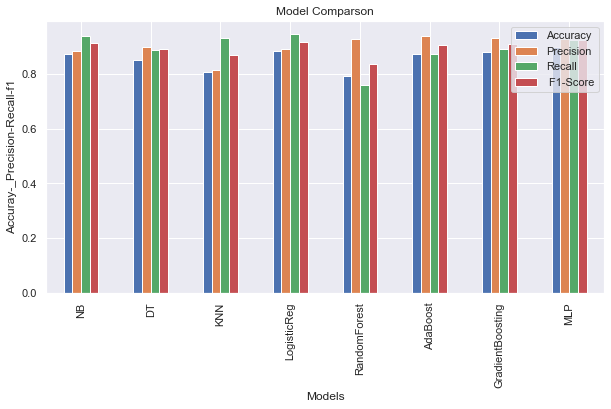

In [50]:
df.plot(kind='bar',figsize=(10,5))
plt.title("Model Comparson")
plt.xlabel("Models")
plt.ylabel("Accuray-_Precision-Recall-f1")

Text(0, 0.5, 'Accuray-_Precision-Recall-f1')

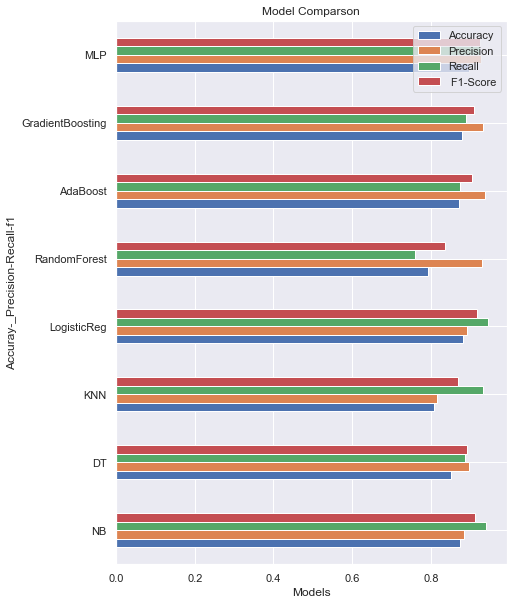

In [51]:
df.plot(kind='barh',figsize=(7,10))
plt.title("Model Comparson")
plt.xlabel("Models")
plt.ylabel("Accuray-_Precision-Recall-f1")

Text(0, 0.5, 'Accuray-_Precision-Recall-f1')

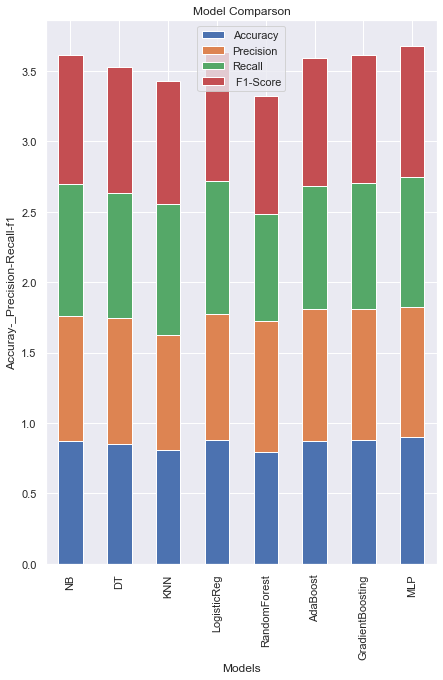

In [52]:

df.plot(kind='bar',figsize=(7,10),stacked=True)
plt.title("Model Comparson")
plt.xlabel("Models")
plt.ylabel("Accuray-_Precision-Recall-f1")